In [1]:
# Importing required libraries
import pandas as pd
from sodapy import Socrata
import numpy as np
import folium
import plotly
import plotly.figure_factory as ff
from folium.plugins import HeatMap
import requests
from collections import Counter

In [2]:
# Importing required API
client = Socrata("data.cityofnewyork.us",
                  "woqOj0yWsQzkpr7i6BVEGMKqV",    # Using my account credentials to get access to API
                  "puneetag@buffalo.edu",         # NOTE: Use your own account credentials.
                  "Cobrasss02$")
results = client.get("9s4h-37hy",limit=1000000)   # Importing first 1000000 rows of data

In [3]:
# Creating a list consisting of last 10000 rows of API data
myList=results[-10000:]

In [4]:
# Creating my base dataframe using data stored in myList
results_df = pd.DataFrame.from_records(myList)
results_df.head()

addr_pct_cd        boro_nm             cmplnt_fr_dt cmplnt_fr_tm cmplnt_num  \
0          88       BROOKLYN  2014-07-07T00:00:00.000     20:30:00  445097596   
1          42          BRONX  2016-05-23T00:00:00.000     11:53:00  924476946   
2         103         QUEENS  2012-05-21T00:00:00.000     12:10:00  437698810   
3          84       BROOKLYN  2009-08-01T00:00:00.000     08:00:00  219364629   
4         120  STATEN ISLAND  2007-03-24T00:00:00.000     18:45:00  883722190   

              cmplnt_to_dt cmplnt_to_tm crm_atpt_cptd_cd hadevelopt  \
0  2014-07-07T00:00:00.000     20:40:00        COMPLETED    WHITMAN   
1  2016-05-23T00:00:00.000     12:00:00        COMPLETED        NaN   
2  2012-05-21T00:00:00.000     12:15:00        COMPLETED        NaN   
3  2009-09-15T00:00:00.000     00:01:00        COMPLETED        NaN   
4  2007-03-24T00:00:00.000     18:50:00        COMPLETED        NaN   

            juris_desc    ...     loc_of_occur_desc      longitude  \
0  N.Y. HOUSING POLICE    ...                INSIDE  -73.975125947   
1  N.Y. HOUSING POLICE    ...                INSIDE  -73.903643392   
2     N.Y. POLICE DEPT    ...                INSIDE  -73.798850489   
3     N.Y. POLICE DEPT    ...               REAR OF  -73.991120647   
4     N.Y. POLICE DEPT    ...                INSIDE  -74.135615573   

                        ofns_desc parks_nm pd_cd  \
0    ASSAULT 3 & RELATED OFFENSES      NaN   101   
1    ASSAULT 3 & RELATED OFFENSES      NaN   101   
2  CRIMINAL MISCHIEF & RELATED OF      NaN   269   
3  CRIMINAL MISCHIEF & RELATED OF      NaN   258   
4  CRIMINAL MISCHIEF & RELATED OF      NaN   259   

                            pd_desc               prem_typ_desc  \
0                         ASSAULT 3  RESIDENCE - PUBLIC HOUSING   
1                         ASSAULT 3  RESIDENCE - PUBLIC HOUSING   
2    MISCHIEF,CRIMINAL,    UNCL 2ND                  DRUG STORE   
3    CRIMINAL MISCHIEF 4TH, GRAFFIT         COMMERCIAL BUILDING   
4  CRIMINAL MISCHIEF,UNCLASSIFIED 4         COMMERCIAL BUILDING   

                    rpt_dt x_coord_cd y_coord_cd  
0  2014-07-07T00:00:00.000     991148     192533  
1  2016-05-23T00:00:00.000    1010919     239073  
2  2012-05-21T00:00:00.000    1040022     195779  
3  2009-09-22T00:00:00.000     986713     189119  
4  2007-03-24T00:00:00.000     946610     170546  

[5 rows x 24 columns]

In [7]:
# Here we use three steps of code for each borough in NYC
# 1) First we create a new dataframe for each borough that contains its respective information
# 2) Secondly we create a list that tells us about the complaints received in a particular borough
# 3) Finally we count the number of complaints by each offence type in that particular borough

# For Brooklyn
dist1_df=results_df[results_df.boro_nm == 'BROOKLYN']
ofns=list(dist1_df.law_cat_cd)
alpha1=Counter(ofns)

# For Bronx
dist2_df=results_df[results_df.boro_nm == 'BRONX']
ofns=list(dist2_df.law_cat_cd)
alpha2=Counter(ofns)

# For Queens
dist3_df=results_df[results_df.boro_nm == 'QUEENS']
ofns=list(dist3_df.law_cat_cd)
alpha3=Counter(ofns)

# For Manhattan
dist4_df=results_df[results_df.boro_nm == 'MANHATTAN']
ofns=list(dist4_df.law_cat_cd)
alpha4=Counter(ofns)

# For Staten Island
dist5_df=results_df[results_df.boro_nm == 'STATEN ISLAND']
ofns=list(dist5_df.law_cat_cd)
alpha5=Counter(ofns)

x1 = list(alpha1.values())
x2 = list(alpha2.values())
x3 = list(alpha3.values()) 
x4 = list(alpha4.values())
x5 = list(alpha5.values())

In [8]:
# Plot 1 : Creating radar plot that show the number of complaints by each offense type received in each borough of NYC
import plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

data = [
    go.Scatterpolar(
      r = x1,
      theta = ['FELONY','MISDEMEANOR','VIOLATION'],
      fill = 'toself',
      name = 'BROOKLYN'
    ),
    go.Scatterpolar(
      r = x2,
      theta = ['FELONY','MISDEMEANOR','VIOLATION'],
      fill = 'toself',
      name = 'BRONX'
    ),
     go.Scatterpolar(
      r = x5,
      theta = ['FELONY','MISDEMEANOR','VIOLATION'],
      fill = 'toself',
      name = 'STATEN ISLAND'
    )
]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 1700]
    )
  ),
  showlegend = True
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [9]:
# Brooklyn has been identified as the borough of NYC with maximum number of complaints in the given timeline
# Hence in the next plot our motive is to show statistical distribution of complaints by each offence type

vio_df=results_df[results_df.boro_nm == 'BROOKLYN'] # Creating a new dataframe that contains data for borough-'BROOKLYN'
ofns=list(vio_df.ofns_desc)                         # Creating a list that contains the information for offences in Brooklyn
alpha=Counter(ofns)                                 # Counting the number of complaints by each offence type in Brooklyn
alpha

Counter({nan: 9,
         u'ADMINISTRATIVE CODE': 12,
         u'ALCOHOLIC BEVERAGE CONTROL LAW': 1,
         u'ARSON': 16,
         u'ASSAULT 3 & RELATED OFFENSES': 335,
         u"BURGLAR'S TOOLS": 1,
         u'BURGLARY': 120,
         u'CRIMINAL MISCHIEF & RELATED OF': 304,
         u'CRIMINAL TRESPASS': 19,
         u'DANGEROUS DRUGS': 204,
         u'DANGEROUS WEAPONS': 83,
         u'DISORDERLY CONDUCT': 1,
         u'FELONY ASSAULT': 129,
         u'FORGERY': 35,
         u'FRAUDS': 19,
         u'GRAND LARCENY': 257,
         u'GRAND LARCENY OF MOTOR VEHICLE': 58,
         u'HARRASSMENT 2': 380,
         u'INTOXICATED & IMPAIRED DRIVING': 50,
         u'MISCELLANEOUS PENAL LAW': 89,
         u'MURDER & NON-NEGL. MANSLAUGHTER': 7,
         u'NYS LAWS-UNCLASSIFIED FELONY': 3,
         u'OFF. AGNST PUB ORD SENSBLTY &': 176,
         u'OFFENSES AGAINST PUBLIC ADMINI': 43,
         u'OFFENSES AGAINST THE PERSON': 10,
         u'OFFENSES INVOLVING FRAUD': 4,
         u'OTHER OFFENSE

In [10]:
# Plot 2: Creating a violin plot for statistical analysis of offences in Brooklyn
import plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

fig = {
    "data": [{
        "type": 'violin',
        "y": list(alpha.values()),
        "box": {
            "visible": True
        },
        "line": {
            "color": 'black'
        },
        "meanline": {
            "visible": True
        },
        "fillcolor": '#8dd3c7',
        "opacity": 0.6,
        "x0": 'Occurrence of offenses in a particular precinct of Brooklyn'
    }],
    "layout" : {
        "title": "STATISTICAL ANALYSIS OF OFFENCES IN BROOKLYN",
        "yaxis": {
            "zeroline": False,
            "label": "dd"
        }
    }
}

py.offline.iplot(fig, validate = False)

In [11]:
# Take the values of lat and lon from base dataframe 'results_df' and store them in a list lat and lon
lat= list(results_df["latitude"].astype(float))
lon= list(results_df["longitude"].astype(float))

# Store lat and lon list in Loc and take transpose 
Loc=np.array([lat,lon]).T

In [12]:
# Now we generate folium maps for our API data
# So, importing required libraries for folium maps
import folium 
from folium import plugins
from folium.plugins import HeatMap
import requests

In [13]:
# Make map m and store a location in it as a starting point
m =folium.Map(location=[40.730610, -73.935242], zoom_start= 10)

# Add marker cluster to map m using Loc data
plugins.MarkerCluster(Loc).add_to(m)

# Save map to given direction
# Map 1 : It gives us the location from which the complaints were received
# While saving this map make sure to change the directory as per your preferred location
m.save("C:/Users/punit/OneDrive/Desktop/Programming for Analytics/New_Map1.html")

In [14]:
# Selecting columns of interest and storing it in a new dataframe 'dfup'
dfup=results_df[["cmplnt_fr_dt","cmplnt_fr_tm","ofns_desc","latitude","longitude"]]

# Dropping null values in dataframe 'dfup'
dfup=dfup.dropna()

# Take the values of lat and lon from dfup
lat= list(dfup["latitude"].astype(float))
lon= list(dfup["longitude"].astype(float))
comp=list(dfup["ofns_desc"])

# Store lat and lon list in Loc and take trnspose 
Loc1=np.array([lat,lon]).T

# Viewing number of unique complaints
complaints=list(dfup.ofns_desc.unique())

In [15]:
# Function to convert datetime datatype to just date (To simplify our data analysis)
import datetime
def date1(tmp):
    dt=datetime.datetime.strptime(tmp,'%Y-%m-%dT%H:%M:%S.000')
    dt.date()
    dd=dt.date()
    return (dd)
# applying function to complaint datetime and storing the date in new column Date
dfup["Date"]=dfup["cmplnt_fr_dt"].apply(date1)

In [16]:
# Importing libraries
from datetime import date
import calendar
import datetime 

# Function that take date and convert to weekday
def weekDay(date):    
    Wday=calendar.day_name[date.weekday()]
    return(Wday)

# Applying function to date and storing the day in new column Day
dfup["Day"]=dfup["Date"].apply(weekDay)

In [17]:
# Convert time string to hour
def dTime(datime):
    hour,minutes,seconds=(int(x)for x in datime.split(":"))
    dayhour=hour+minutes/float(60)+seconds/3600
    return(dayhour)

# Applying function to time in dfup and store it in new column DayHour
dfup["DayHour"]=dfup["cmplnt_fr_tm"].apply(dTime)
dayD=list(dfup["Day"])

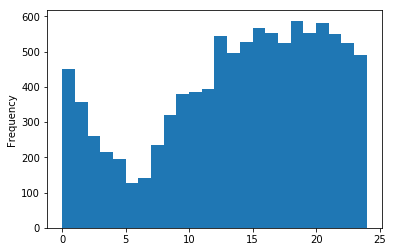

In [18]:
# Plot 3 : Plotting histogram for crime rate during 24 hour
import matplotlib.pyplot as plt
H=dfup["DayHour"].plot(kind="hist",bins=24)
plt.show()

In [19]:
# Coloring by each day
def colorDay(Di):
    if Di =="Monday":
        return "orange"
    elif Di== "Tuesday":
        return "yellow"
    elif Di== "Wednesday":
        return "green"
    elif Di== "Thursday":
        return "blue"
    elif Di== "Friday":
        return "purple"
    elif Di== "Saturday":
        return "red"
    elif Di== "Sunday":
        return "black"

In [20]:
# Map 2: Creating a map which shows location of each complaint on each day of week
map3 = folium.Map(location=[40.730610, -73.935242], zoom_start= 10)

# Creat Feature Group
fg3= folium.FeatureGroup(name = "Saturday Crimes")
fg4= folium.FeatureGroup(name = "Sunday Crimes")
fg5= folium.FeatureGroup(name = "Monday Crimes")
fg6= folium.FeatureGroup(name = "Tuesday Crimes")
fg7= folium.FeatureGroup(name = "Wednesday Crimes")
fg8= folium.FeatureGroup(name = "Thursday Crimes")
fg9= folium.FeatureGroup(name = "Friday Crimes")

for lt, ln,cm,Di in zip(lat,lon,comp,dayD):
    if Di=="Saturday":
        fg3.add_child(folium.CircleMarker(
                                radius=5,
                                location=[lt,ln],
                                popup= folium.Popup(str(cm),parse_html= True),
                                color= "grey",
                                fill=True,
                                fill_color= colorDay(Di),
                                fill_opacity=0.4))    
    elif Di=="Sunday":
        fg4.add_child(folium.CircleMarker(
                                radius=5,
                                location=[lt,ln],
                                popup= folium.Popup(str(cm),parse_html= True),
                                color= "grey",
                                fill=True,
                                fill_color= colorDay(Di),
                                fill_opacity=0.4)) 
    elif Di=="Monday":
        fg5.add_child(folium.CircleMarker(
                                radius=5,
                                location=[lt,ln],
                                popup= folium.Popup(str(cm),parse_html= True),
                                color= "grey",
                                fill=True,
                                fill_color= colorDay(Di),
                                fill_opacity=0.4))  
    elif Di=="Tuesday":
        fg6.add_child(folium.CircleMarker(
                                radius=5,
                                location=[lt,ln],
                                popup= folium.Popup(str(cm),parse_html= True),
                                color= "grey",
                                fill=True,
                                fill_color= colorDay(Di),
                                fill_opacity=0.4)) 
    elif Di=="Wednesday":
        fg7.add_child(folium.CircleMarker(
                                radius=5,
                                location=[lt,ln],
                                popup= folium.Popup(str(cm),parse_html= True),
                                color= "grey",
                                fill=True,
                                fill_color= colorDay(Di),
                                fill_opacity=0.4))    
    elif Di=="Thursday":
        fg8.add_child(folium.CircleMarker(
                                radius=5,
                                location=[lt,ln],
                                popup= folium.Popup(str(cm),parse_html= True),
                                color= "grey",
                                fill=True,
                                fill_color= colorDay(Di),
                                fill_opacity=0.4))  
    elif Di=="Friday":
        fg9.add_child(folium.CircleMarker(
                                radius=5,
                                location=[lt,ln],
                                popup= folium.Popup(str(cm),parse_html= True),
                                color= "grey",
                                fill=True,
                                fill_color= colorDay(Di),
                                fill_opacity=0.4)) 
# Add feature group to map
map3.add_child(fg3)
map3.add_child(fg4)
map3.add_child(fg5)
map3.add_child(fg6)
map3.add_child(fg7)
map3.add_child(fg8)
map3.add_child(fg9)

# Add control layer after adding the feature groups
map3.add_child(folium.LayerControl())

# Save chart to this directory
# While saving this map make sure to change the directory as per your preferred location
map3.save("C:/Users/punit/OneDrive/Desktop/Programming for Analytics/New_Map3.html")

In [21]:
# Map 3 : Creating heat map to show density of complaints received in NYC
map4 = folium.Map(location=[40.730610, -73.935242],tiles='stamentoner', zoom_start= 10)

# Making sure datatype is float
dfup["latitude"]=dfup["latitude"].astype(float)
dfup["longitude"]=dfup["longitude"].astype(float)

# Storing data for heat map
heat_data = [[row['latitude'],row['longitude']] for index, row in dfup.iterrows()]

HeatMap(data= heat_data).add_to(map4)

# Save chart to this directory
# While saving this map make sure to change the directory as per your preferred location
map4.save("C:/Users/punit/OneDrive/Desktop/Programming for Analytics/New_Map4.html")